# Explicite Runge-Kutta method

In [53]:
RR=RealField(400)
load("fdm.sage")

## Example 1


In [54]:
var("x,t")
x_exact=-t^2 - 2*t + 2*e^t - 2
pr1=Initial_problem(x,t^2+x,0,1)

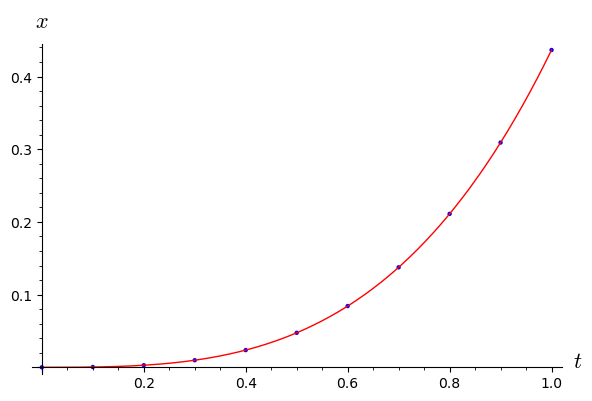

In [55]:
P=erk(pr1, N=10)
P.plot(t,x) + plot(x_exact,(0,1),color='red')

In [11]:
L=[erk(pr1, N = 2^n*10) for n in range(10)]

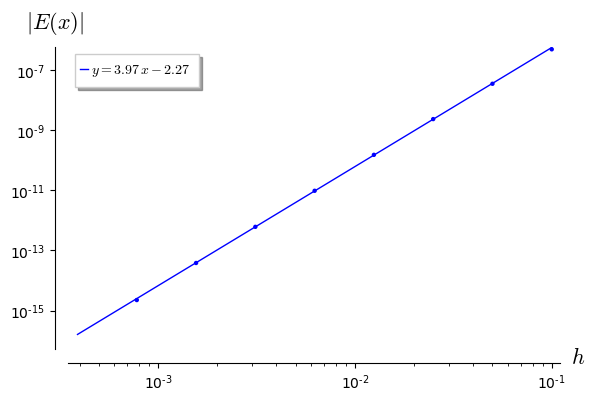

In [13]:
richardson_plot(L,x,0.9, nmin=1, nmax=7)

In [14]:
richardson(L[0],L[1],x,0.8)

[0.211081834707055, -1.86964065451711e-8]

In [15]:
L[1].value(x,0.8) - RR(x_exact.subs(t=0.8))

-2.22778800407220e-8

## Another tableau

In [56]:
load("butchers_list.sage")
B=butchers_list[7]

In [59]:
B.latex()

\begin{array}{c|ccccccc}
 &  &  &  &  &  &  & \\
\frac{1}{2} & \frac{1}{2} &  &  &  &  &  & \\
\frac{2}{3} & \frac{2}{9} & \frac{4}{9} &  &  &  &  & \\
\frac{1}{3} & \frac{7}{36} & \frac{2}{9} & -\frac{1}{12} &  &  &  & \\
\frac{5}{6} & -\frac{35}{144} & -\frac{55}{36} & \frac{35}{48} & \frac{15}{8} &  &  & \\
\frac{1}{6} & -\frac{1}{360} & -\frac{11}{36} & -\frac{1}{8} & \frac{1}{2} & \frac{1}{10} &  & \\
1 & -\frac{41}{260} & \frac{22}{13} & \frac{43}{156} & -\frac{118}{39} & \frac{32}{195} & \frac{80}{39} & \\
\hline
 & \frac{13}{200} &  & \frac{11}{40} & \frac{11}{40} & \frac{4}{25} & \frac{4}{25} & \frac{13}{200}
\end{array}


$$\begin{array}{c|ccccccc}
 &  &  &  &  &  &  & \\
\frac{1}{2} & \frac{1}{2} &  &  &  &  &  & \\
\frac{2}{3} & \frac{2}{9} & \frac{4}{9} &  &  &  &  & \\
\frac{1}{3} & \frac{7}{36} & \frac{2}{9} & -\frac{1}{12} &  &  &  & \\
\frac{5}{6} & -\frac{35}{144} & -\frac{55}{36} & \frac{35}{48} & \frac{15}{8} &  &  & \\
\frac{1}{6} & -\frac{1}{360} & -\frac{11}{36} & -\frac{1}{8} & \frac{1}{2} & \frac{1}{10} &  & \\
1 & -\frac{41}{260} & \frac{22}{13} & \frac{43}{156} & -\frac{118}{39} & \frac{32}{195} & \frac{80}{39} & \\
\hline
 & \frac{13}{200} &  & \frac{11}{40} & \frac{11}{40} & \frac{4}{25} & \frac{4}{25} & \frac{13}{200}
\end{array}$$

In [22]:
B.order()

6

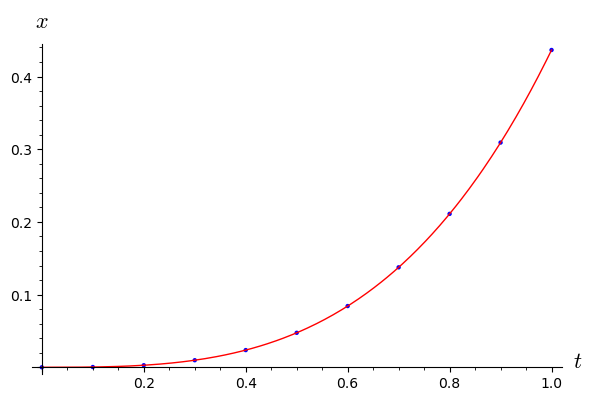

In [23]:
P=erk(pr1, N=10, tableau=B)
P.plot(t,x) + plot(x_exact,(0,1),color='red')

In [24]:
L=[erk(pr1, N = 2^(n+1), tableau=B) for n in range(10)]

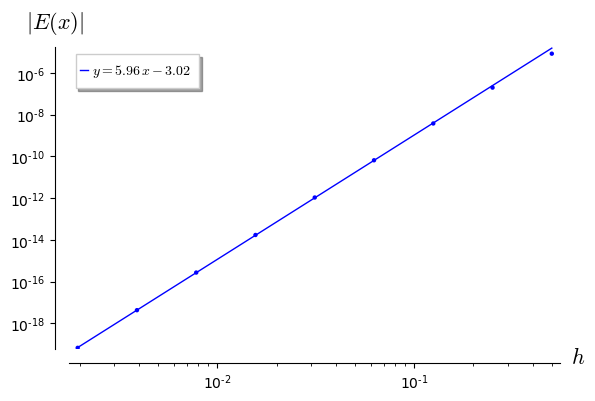

In [25]:
richardson_plot(L,x,1, nmin=2)

In [26]:
richardson(L[4],L[3],x,0.8)

[0.211081856984342, -5.61450357105557e-13]

In [27]:
L[4].value(x,0.8) - RR(x_exact.subs(t=0.8))

-5.93747273569534e-13

In [28]:
richardson(L[-1],L[-2],x,0.8)

[0.211081856984935, -0.000000000000000]

In [29]:
L[-1].value(x,0.8)-x_exact.subs(t=0.8)

-2.22044604925031e-16

## Example 2

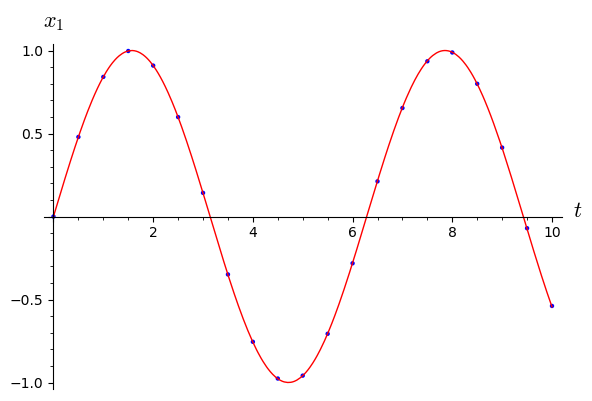

In [41]:
var("x1,x2,t")
pr2=Initial_problem([x1,x2], [x2,-x1],[0,1], 10)
P=erk(pr2, N=20)
P.plot(t,x1) + plot(sin,(0,10),color='red')

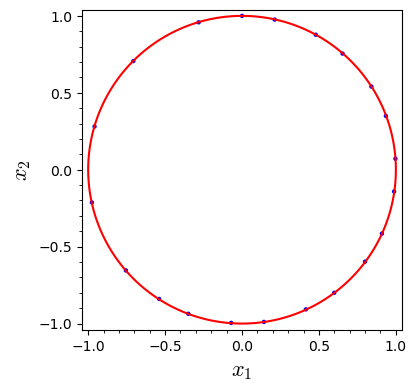

In [42]:
P.plot(x1,x2) + implicit_plot(x1^2+x2^2-1,(x1,-1,1), (x2,-1,1),color='red')

In [43]:
L=[erk(pr2, N=2^n*10) for n in range(10)]

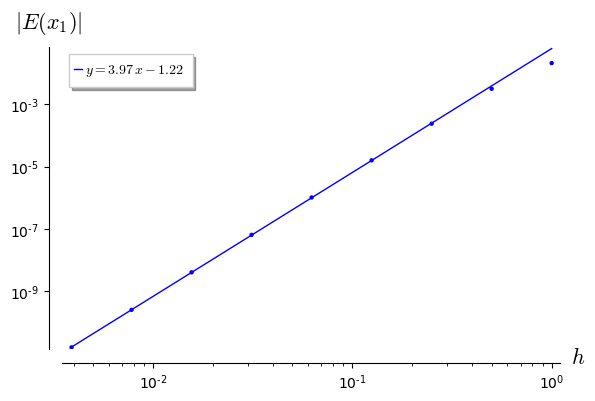

In [44]:
richardson_plot(L,x1,9, nmin=2)

In [45]:
richardson(L[-1],L[-2],x1,9)

[0.412118485242750238107337838483253280357429594574658228351746724838481650177360051037134518331080451535024350979882522479,
 9.92883144302838469755786735434268298691318996645367563259166867914384523408010474959495745206770274334699924794850059696e-13]

In [46]:
L[-1].value(x1,9)-sin(9).n()

9.93649607039515e-13

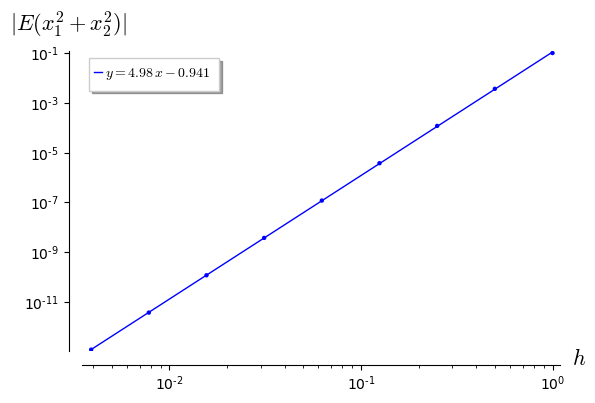

In [47]:
richardson_plot(L,x1^2+x2^2,9)

In [48]:
richardson(L[-1],L[-2],x1^2+x2^2-1,9, delta=-1)

[-3.55271198473460011124326883937077441807096335338567955102932229497661434145021629258099821440729431584753983747974496598e-15,
 -3.55270673859485396800626440307284115379931215712783861799743261950072943803945046793325799526796333980472834296761985182e-15]

## Example 3

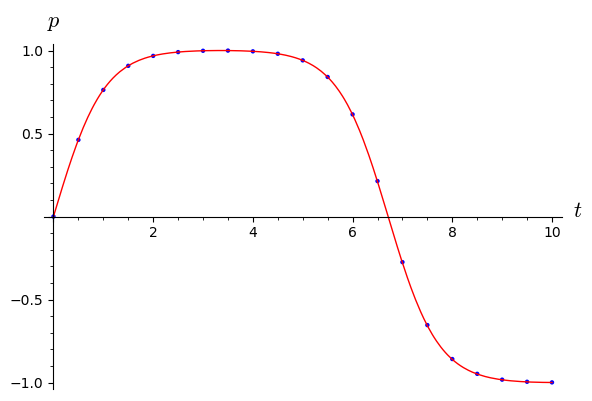

In [49]:
var("p,q,r,t")
k=0.99
pr3=Initial_problem([p,q,r], [q*r,-p*r,-k^2*p*q], [0,1,1], 10)
P=erk(pr3, N=20)
P.plot(t,p)+plot(jacobi('sn', t, k^2),(t,0,10), color='red')

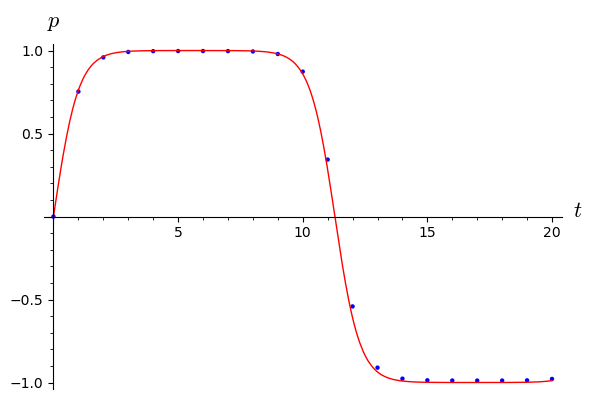

In [50]:
var("p,q,r,t")
k=0.9999
pr3=Initial_problem([p,q,r], [q*r,-p*r,-k^2*p*q], [0,1,1], 20)
P=erk(pr3, N=20)
P.plot(t,p)+plot(jacobi('sn', t, k^2),(t,0,20), color='red')